In [8]:
import pandas as pd
import numpy as np
import gzip

In [70]:
def Create_taxID_to_SciName(Path="Data/Bacterial_scientific_names.dmp.gz"):
    with gzip.open(Path, "rt") as file:
        Name_Lines = [Entry.split("|") for Entry in file.readlines()]

    taxID_to_SciName = {}
    SciName_to_taxID={}
    for Entry in Name_Lines:
        taxID_to_SciName[Entry[0].strip()] = Entry[1].strip()
        SciName_to_taxID[Entry[1].strip().lower()] = Entry[0].strip()
    return taxID_to_SciName, SciName_to_taxID

taxID_to_SciName, SciName_to_taxID = Create_taxID_to_SciName(Path="Data/Bacterial_scientific_names.dmp.gz")

In [80]:
SciName_to_taxID["coxiella"] = '776'
SciName_to_taxID['morganella'] = '581'
SciName_to_taxID['candidatus'] = '1224'
SciName_to_taxID['bacillus'] = '1386'
SciName_to_taxID['bosea'] = '85413'
SciName_to_taxID['paracoccus'] = '265'
SciName_to_taxID['proteus'] = '583'


SciName_to_taxID['rhodococcus'] = '1827'

SciName_to_taxID['yersinia'] = '629'




In [3]:
# def taxID_to_SciName(Path="Data/sci_names.dmp.gz"):
#     ### Get files
with gzip.open("Data/GenBank_Bacterial_taxID_lineage.tsv.gz", "rt") as file:
    GB_Lines = [Entry.split("\t") for Entry in file.readlines()]

with gzip.open("Data/IBM_assemblies_taxonomy_metadata.tsv.gz", "rt") as file:
    IBM_Lines = [Entry.split("\t") for Entry in file.readlines()]

In [96]:
with gzip.open("Data/Bacteria_taxonomic_summary.tsv.gz", "rt") as file:
    Lines = [Line for Line in file.readlines()]

taxID_to_lineage = {}
taxID_to_Rank_lineage={}
for Line in Lines[:]:    
    taxID_to_lineage[Line.split("\t")[0]] = Line.split("\t")[1].split(",")
    taxID_to_Rank_lineage[Line.split("\t")[0]] = Line.split("\t")[3].split(",")


In [51]:
np_array = np.load("Data/compositeAllGenera.npy")

In [23]:
Genera = list(np.load("Data/processedGenera.npy"))

In [20]:
df = pd.DataFrame(np_array)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.321233,0.300719,0.999997,0.318322,0.307558,0.309531,0.330469,0.349183,0.622187,...,0.347322,0.343644,0.284655,0.696430,0.346320,0.343295,0.347007,0.416574,0.322718,0.322959
1,0.321233,0.000000,0.326666,0.999962,0.349025,0.359773,0.349025,0.327835,0.349025,0.907004,...,0.609415,0.295364,0.312353,0.938971,0.266700,0.348197,0.418962,0.349025,0.379509,0.426223
2,0.300719,0.326666,0.000000,0.999958,0.300214,0.352640,0.303239,0.299148,0.349025,0.606438,...,0.294229,0.297520,0.250610,0.360461,0.316203,0.304461,0.377777,0.313452,0.328631,0.378797
3,0.999997,0.999962,0.999958,0.000000,0.999970,0.999999,0.999978,0.999986,0.999983,0.999972,...,0.999978,0.999960,0.999958,1.000000,0.999969,0.999992,1.000000,0.999990,0.999999,0.999999
4,0.318322,0.349025,0.300214,0.999970,0.000000,0.267512,0.759885,0.327574,0.330472,0.681155,...,1.000000,0.318975,0.289789,0.384953,0.329860,0.417233,0.261419,0.343034,0.341720,0.252594


In [97]:
Lineages_dict = {}
Rank_dict = {}
for Entry in Genera:
    try:
#         print(Entry)
#         print(SciName_to_taxID[Entry])
        Lineages_dict[Entry] = taxID_to_lineage[SciName_to_taxID[Entry]]
        Rank_dict[Entry] = taxID_to_Rank_lineage[SciName_to_taxID[Entry]]
    except:
        print(Entry)
print(len(set(Genera)))
print(len(Lineages_dict))
print(len(Rank_dict))


151
151
151


In [102]:
Family = []
for Acc in Genera:
#     if Acc == 'candidatus':
#         Family.append("NA")
#         continue
    try:
        Lineage = Lineages_dict[Acc]
        Ranks_Lineage = Rank_dict[Acc]
        Index = Ranks_Lineage.index("family")
        Family.append(taxID_to_SciName[Lineage[Index]])
    except:
        print(Lineage, Ranks_Lineage, Index)
        Family.append("NA")


print(len(Family))

['1224', '2', '131567'] ['phylum', 'superkingdom', 'no rank'] 1
['946234', '186813', '186802', '186801', '1239', '1783272', '2', '131567'] ['genus', 'no rank', 'order', 'class', 'phylum', 'no rank', 'superkingdom', 'no rank'] 1
151


In [103]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
from adjustText import adjust_text
from sklearn import manifold 

In [104]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=2)
results = mds.fit(df)

In [127]:
### Create plot
coords = results.embedding_
Plot = pd.DataFrame(dict(x=coords[:, 0], y=coords[:, 1], label=Genera))
Plot["Family"] = Family
Plot["Genus"] = Genera
Plot["Family count"] =  Plot.groupby('Family')['Family'].transform('count')

Plot.head()

,x,y,label,Family,Genus,Family count
0,-0.010999,0.145869,achromobacter,Alcaligenaceae,achromobacter,2
1,-0.092160,0.226744,acidipropionibacterium,Propionibacteriaceae,acidipropionibacterium,3
2,-0.073462,-0.005952,acidithiobacillus,Acidithiobacillaceae,acidithiobacillus,1
3,-0.180417,0.936371,acinetobacter,Moraxellaceae,acinetobacter,2
4,0.136656,0.220583,actinobacillus,Pasteurellaceae,actinobacillus,4


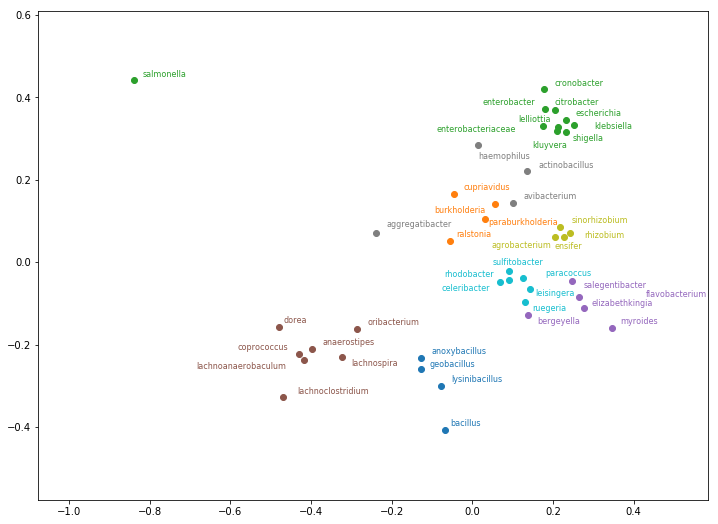

In [185]:
### Plot parameters
from adjustText import adjust_text

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### Plot
groups = Plot.groupby('Family')
Filtered_Plot=groups.filter(lambda x: x["Family count"].count()> 3)
groups = Filtered_Plot.groupby('Family')

fig, ax = plt.subplots()
ax.margins(0.2) # Optional, just adds 5% padding to the autoscaling

colors = cm.tab10(np.linspace(0, 1, len(groups)))
alphas = np.linspace(.2, .8, len(groups))
texts = []
for group, color, alpha in zip(groups, colors, alphas):

    ax.plot(group[1].x, 
            group[1].y, 
            marker='o', 
            linestyle='', 
            ms=6, #6*len(group[1])**(0.5), 
            label=group[0], 
            c=color, 
#             markeredgecolor='k', 
            alpha=1
           )
    for label, x, y in zip(group[1]['label'], group[1]['x'], group[1]['y']):
        texts.append(plt.text(x, y, label, size=8,color=color))

adjust_text(texts, expand_points=(1.4,1.4))
lgd = pylab.legend()
ax.legend_.remove()
plt.show()

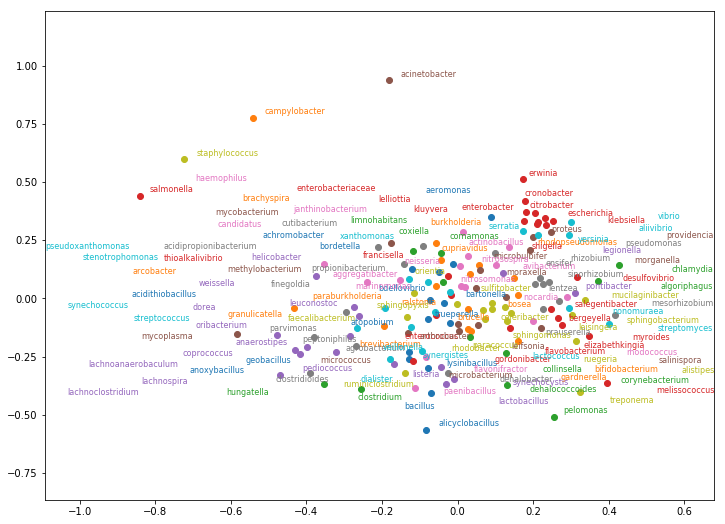

In [207]:
### Plot parameters
from adjustText import adjust_text

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### Plot
groups = Plot.groupby('Family')
Filtered_Plot=groups.filter(lambda x: x["Family count"].count()> 0)
groups = Filtered_Plot.groupby('Family')

fig, ax = plt.subplots()
ax.margins(0.2) # Optional, just adds 5% padding to the autoscaling

colors = cm.tab10(np.linspace(0, 1, len(groups)))
alphas = np.linspace(.2, .8, len(groups))
texts = []
for group, color, alpha in zip(groups, colors, alphas):

    ax.plot(group[1].x, 
            group[1].y, 
            marker='o', 
            linestyle='', 
            ms=6, #6*len(group[1])**(0.5), 
            label=group[0], 
            c=color, 
#             markeredgecolor='k', 
            alpha=1
           )
    for label, x, y in zip(group[1]['label'], group[1]['x'], group[1]['y']):
        texts.append(plt.text(x, y, label, size=8,color=color))

adjust_text(texts, expand_points=(1.4,1.4))
lgd = pylab.legend()
ax.legend_.remove()
plt.show()

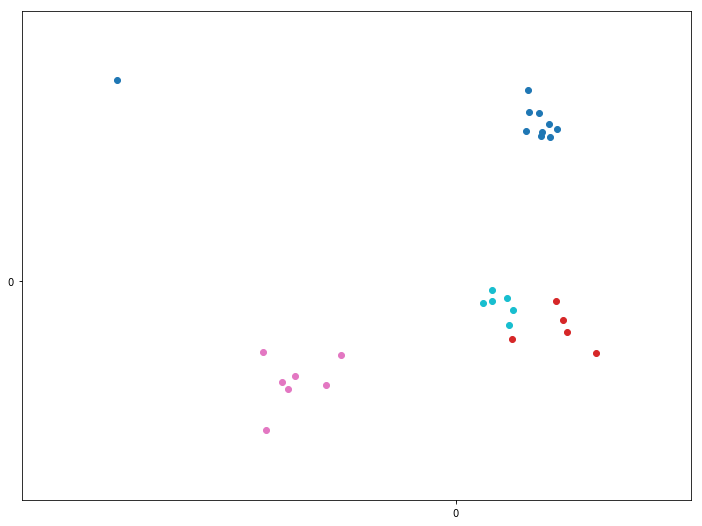

In [211]:
### Plot parameters
from adjustText import adjust_text

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### Plot
groups = Plot.groupby('Family')
Filtered_Plot=groups.filter(lambda x: x["Family count"].count()> 4)
groups = Filtered_Plot.groupby('Family')

fig, ax = plt.subplots()
ax.margins(0.2) # Optional, just adds 5% padding to the autoscaling

colors = cm.tab10(np.linspace(0, 1, len(groups)))
alphas = np.linspace(.2, .8, len(groups))
texts = []
for group, color, alpha in zip(groups, colors, alphas):

    ax.plot(group[1].x, 
            group[1].y, 
            marker='o', 
            linestyle='', 
            ms=6, #6*len(group[1])**(0.5), 
            label=group[0], 
            c=color, 
#             markeredgecolor='k', 
            alpha=1
           )
#     for label, x, y in zip(group[1]['label'], group[1]['x'], group[1]['y']):
#         texts.append(plt.text(x, y, label, size=8,color=color))

# adjust_text(texts, expand_points=(1.4,1.4))
lgd = pylab.legend()
plt.xscale('symlog')
plt.yscale('symlog')
ax.legend_.remove()
plt.show()

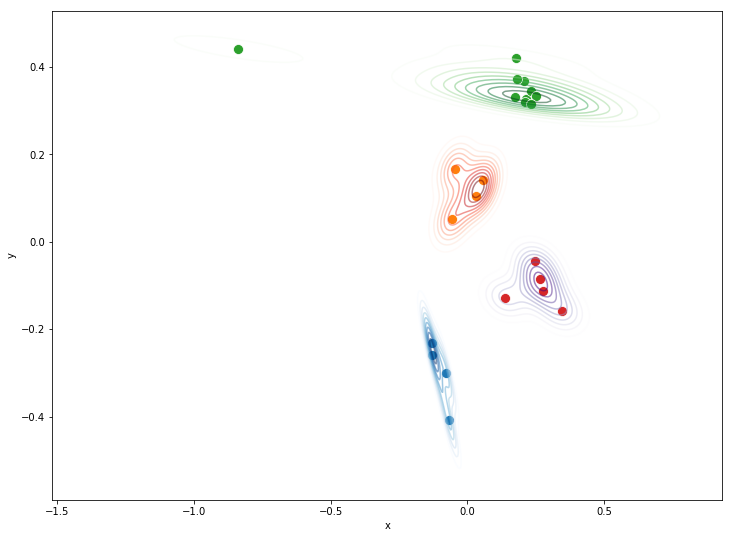

In [186]:
import seaborn as sns
# sns.kdeplot(Plot["x"], Plot["y"])
# sns.kdeplot(Plot["x"], Plot["y"], cmap="Reds", shade=True, bw=.15)
colors = ["Blues", "Reds", "Greens", "Purples"]
for group, color, alpha in zip(groups, colors, alphas):
    sns.kdeplot(group[1].x, group[1].y, cmap=color, alpha=0.5)
    sns.scatterplot(group[1].x, 
            group[1].y,  
            alpha=1,
            s=100
           )

In [195]:
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from scipy.cluster.hierarchy import linkage
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

In [196]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat,metric="jaccard", method=method)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

Method:	 ward


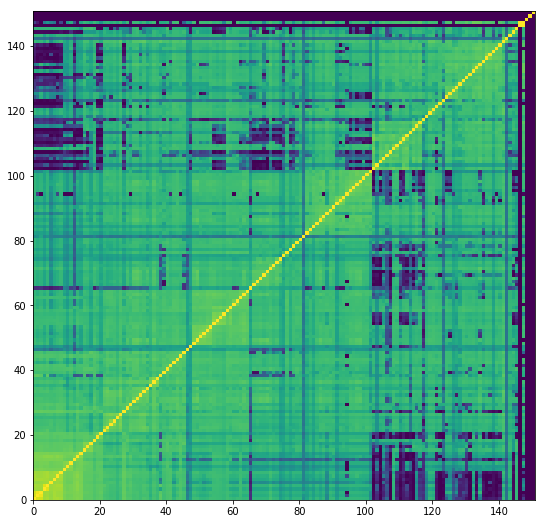

Method:	 single


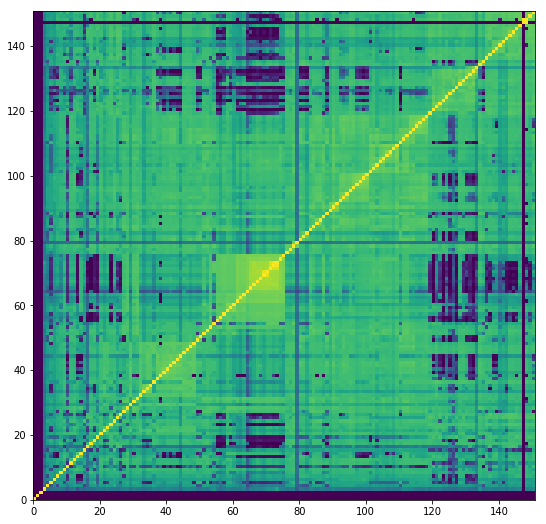

Method:	 average


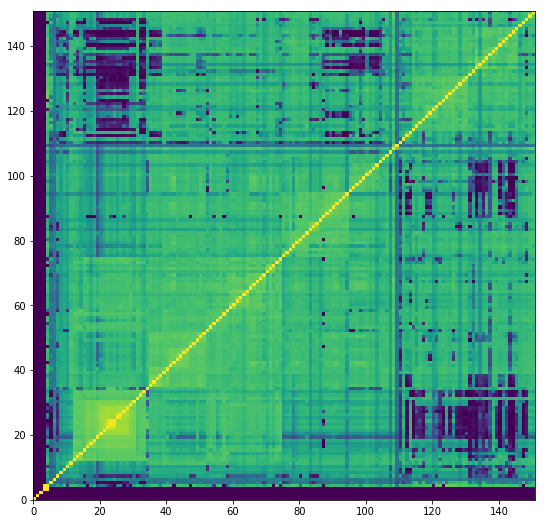

Method:	 complete


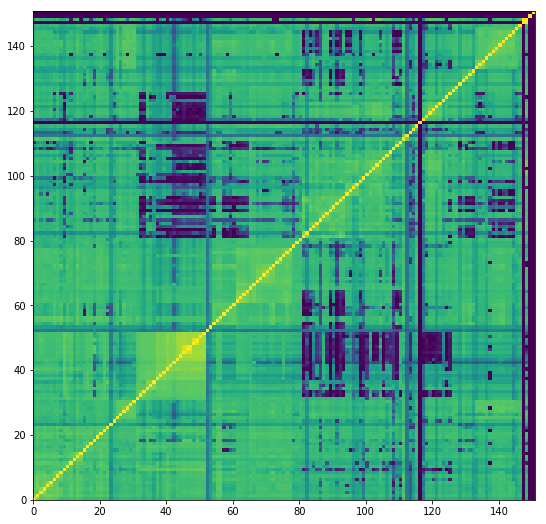

In [197]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(df.values,method)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    plt.pcolormesh(ordered_dist_mat, cmap='viridis_r')
    plt.xlim([0,len(ordered_dist_mat)])
    plt.ylim([0,len(ordered_dist_mat)])
    plt.show()
#     plt.close()

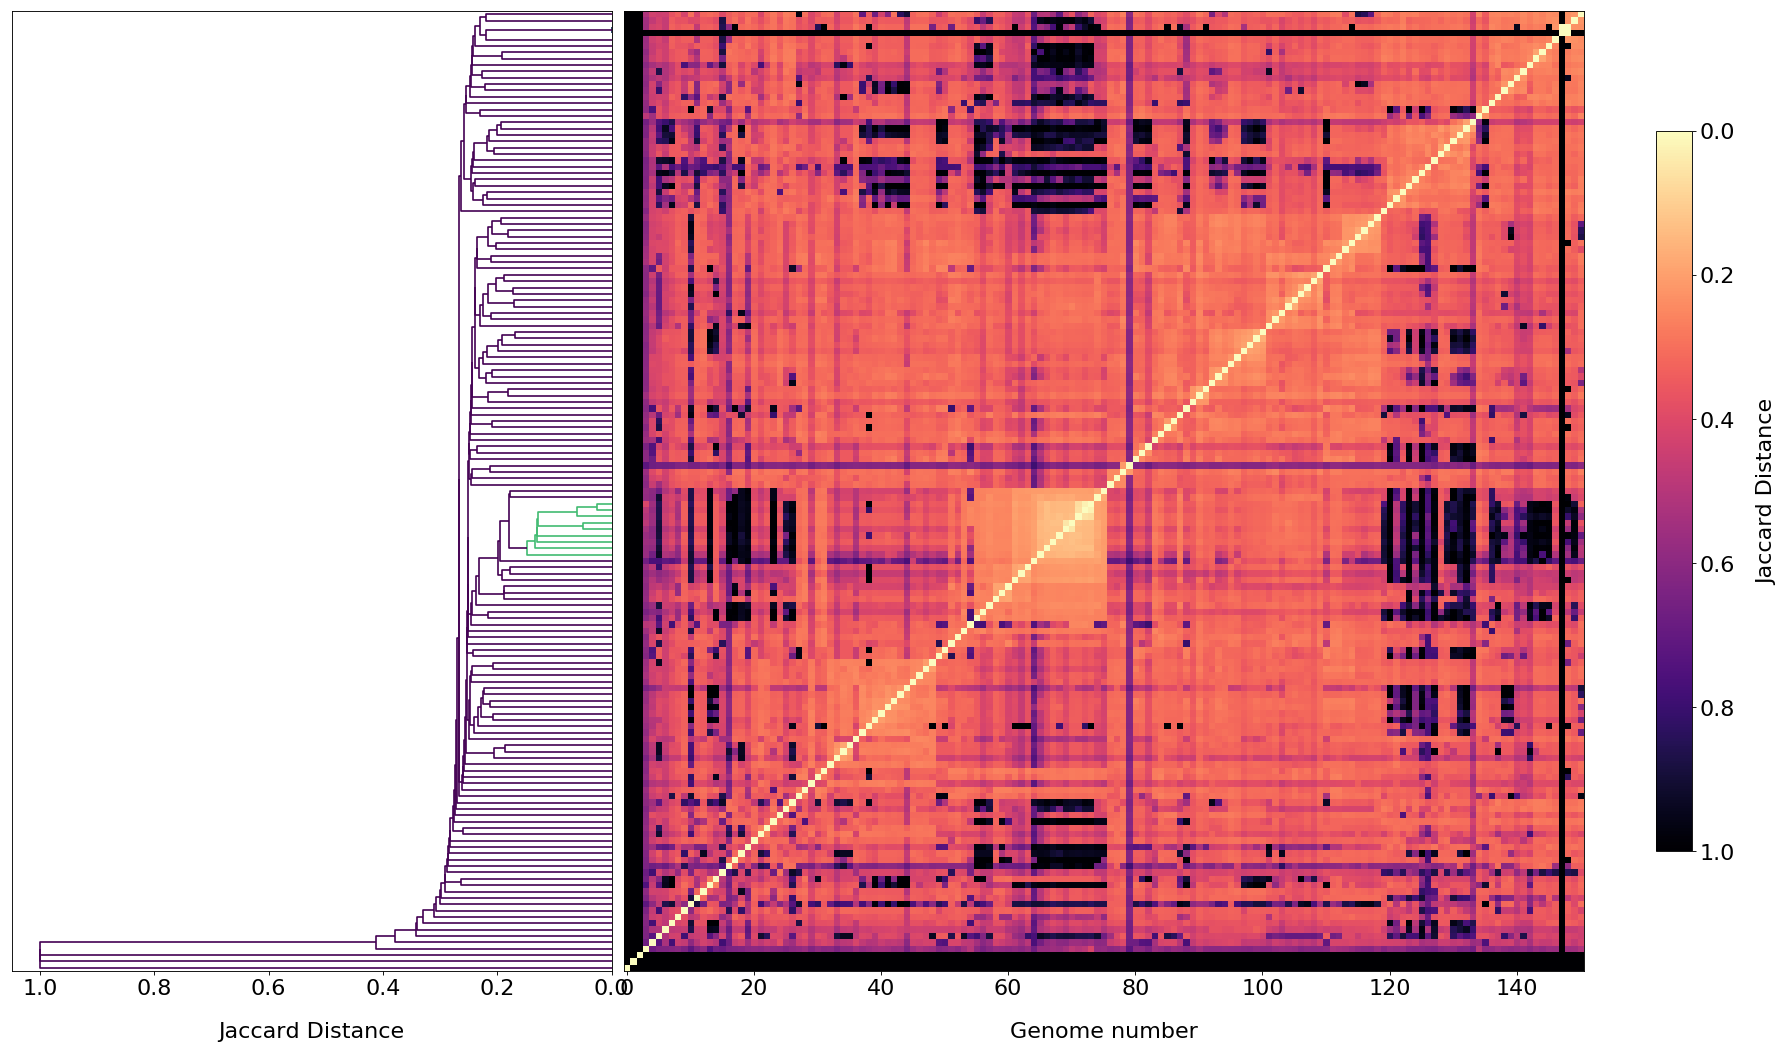

In [208]:
### Combine Tree and Heatmap using ward linkage ###

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(df.values,'single')
ordered_dist_mat = ordered_dist_mat[::-1]

### Make Plot ###
fig=plt.figure(facecolor='white')
fig.set_size_inches(30, 20)
fig.set_dpi(80)
### Plot Dendrogram ###
axd = fig.add_axes([0.05, 0.1, 0.25, 0.6])

hierarchy.set_link_color_palette(['#42bb72ff', "#0c2a50ff", "#0c2a50ff", "#0c2a50ff"])

row_dendr = dendrogram(res_linkage, 
                       labels=Genera, 
                       orientation='left', 
                       color_threshold=0.15, 
                       above_threshold_color='#440154ff')

axd.set_xlabel('Jaccard Distance', fontsize=20, labelpad=20)
axd.tick_params(axis='both', which='major', labelsize=20)
axd.axes.get_yaxis().set_visible(False)


### Plot Heatmap ###
axm = fig.add_axes([0.15, 0.1, 0.6, 0.6])

cax = axm.matshow(ordered_dist_mat, interpolation='nearest', cmap='magma_r')
axm.grid(False)
axm.tick_params(axis='both', which='major', labelsize=20)
axm.axes.get_yaxis().set_visible(False)
axm.xaxis.tick_bottom()
axm.set_xlabel('Genome number', fontsize=20, labelpad=20)

### Color legend ###
colorbar = fig.colorbar(cax,fraction=0.025)
colorbar.ax.invert_yaxis()
colorbar.set_label(label='Jaccard Distance',size=20, labelpad=20)
colorbar.ax.tick_params(labelsize=20) 

### Figure size and resolution ###

# fig.savefig('149539_CCSC_outgroup_subtracted_Hierarchical_tree_and_heatmap_ward-dist.pdf')